# TASK 3: Exploratory Data Analysis - Retail
# By: Srishti Todi
## As a business manager, try to find weak areas where you can work to make more profit.

# Importing Libraries

In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying and Cleaning the data

In [21]:
df=pd.read_csv("C:/Users/srish/Downloads/SampleSuperstore.csv")

In [22]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [23]:
df.shape

(9994, 13)

In [24]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [26]:
duplicate=df.duplicated()
print(duplicate.sum())

17


In [27]:
df=df.drop_duplicates()

In [28]:
df.shape

(9977, 13)

### There are no null values. There were 17 duplicate entries which were removed.

### Removing Outliers

In [29]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


<AxesSubplot:>

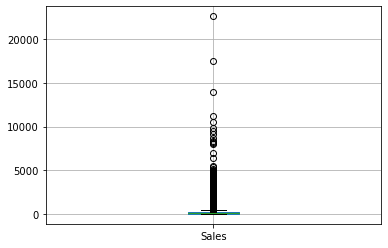

In [30]:
df.boxplot("Sales")

In [31]:
def outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR= Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    return lower_bound,upper_bound

In [ ]:
lowsales,upsales= outliers(df["Sales"])
df["Sales"]=np.where(df["Sales"]<lowsales,lowsales,df["Sales"])
df["Sales"]=np.where(df["Sales"]>upsales,upsales,df["Sales"])

<AxesSubplot:>

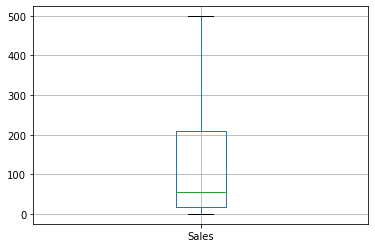

In [14]:
df.boxplot("Sales")

<AxesSubplot:>

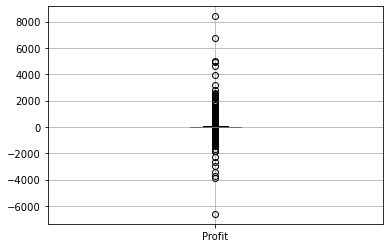

In [15]:
df.boxplot("Profit")

In [16]:
lowprofits,highprofits=outliers(df["Profit"])
df["Profit"]=np.where(df["Profit"]<lowprofits,lowprofits,df["Profit"])
df["Profit"]=np.where(df["Profit"]>highprofits,highprofits,df["Profit"])

<AxesSubplot:>

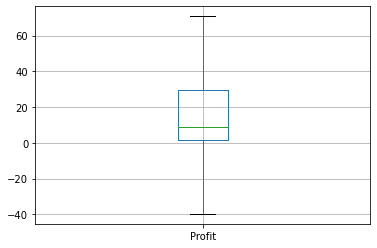

In [19]:
df.boxplot("Profit")

### Understanding correlation between different factors.

In [75]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.007776,0.013110,0.059225,-0.031517
Sales,-0.007776,1.000000,0.265077,-0.060828,0.450235
Quantity,0.013110,0.265077,1.000000,0.008678,0.196670
Discount,0.059225,-0.060828,0.008678,1.000000,-0.497723
Profit,-0.031517,0.450235,0.196670,-0.497723,1.000000


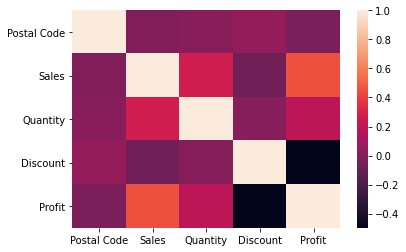

In [66]:
sns.heatmap(df.corr())
plt.show()

#### We can see that profit and discount are negatively correlated.  
#### Sales and profit have a positive correlation of around 0.6

# Data Visualisation

In [33]:
df["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [34]:
((df["Ship Mode"].value_counts())/len(df["Ship Mode"]))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

<AxesSubplot:>

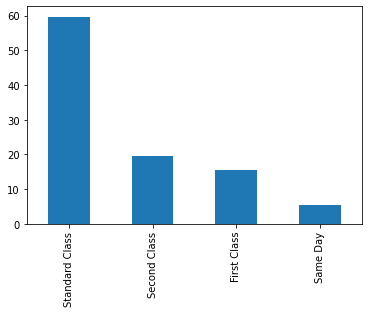

In [35]:
(((df["Ship Mode"].value_counts())/len(df["Ship Mode"]))*100).plot(kind= "bar")

#### Almost 60% of the shipments are standard class
####  19.474% of the shipments are second class
####  15.4% of the shipments are first class and 5.4% are on same day

In [56]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [57]:
((df["Segment"].value_counts())/len(df["Segment"]))*100

Consumer       51.949484
Corporate      30.219505
Home Office    17.831011
Name: Segment, dtype: float64

<AxesSubplot:>

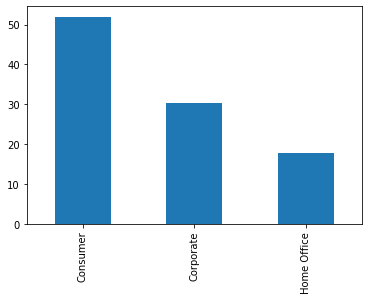

In [58]:
(((df["Segment"].value_counts())/len(df["Segment"]))*100).plot(kind= "bar")

#### 52% of the customers are Consumers
#### 30.2% of the customers are from Corporate
#### 17.83% of the customers are from Home Office 

In [59]:
df["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [60]:
((df["Category"].value_counts())/len(df["Category"]))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:>

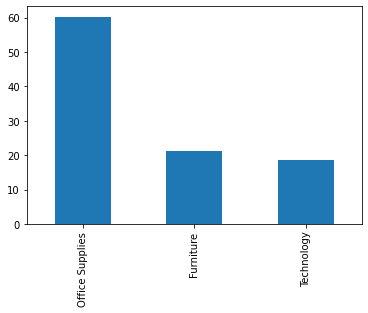

In [61]:
(((df["Category"].value_counts())/len(df["Category"]))*100).plot(kind = "bar")

#### 60.25% of the products sold are Office Supplies
#### 21.23% of the product sold are Furniture
#### 18.5% of the products sold are Technology

In [62]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [63]:
((df["Sub-Category"].value_counts())/len(df["Sub-Category"]))*100

Binders        15.255087
Paper          13.621329
Furnishings     9.582039
Phones          8.910494
Storage         8.479503
Art             7.968327
Accessories     7.767866
Chairs          6.164178
Appliances      4.670743
Labels          3.638368
Tables          3.197354
Envelopes       2.545855
Bookcases       2.285256
Fasteners       2.175003
Supplies        1.904380
Machines        1.152651
Copiers         0.681568
Name: Sub-Category, dtype: float64

<AxesSubplot:>

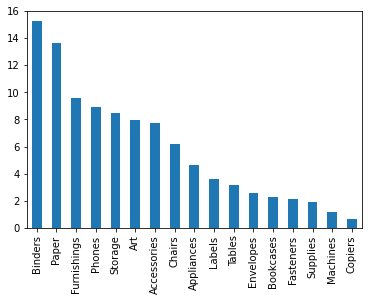

In [64]:
(((df["Sub-Category"].value_counts())/len(df["Sub-Category"]))*100).plot(kind= "bar")

#### We can see that out of all the products sold, binders comprise around 15%, followed by paper at 13% and furnishings at 9.5%

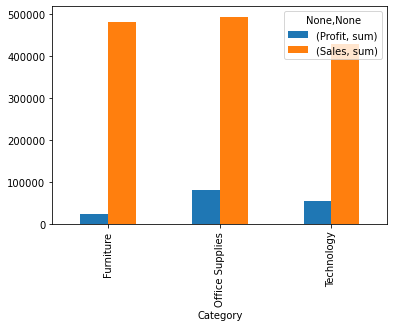

In [67]:
df.groupby("Category")[["Profit", "Sales"]].agg(["sum"]).plot.bar()
plt.show()

#### We can conclude that office supplies have the maximum sale and generate the maximum profit. Technology has the second highest profit with third highest sales. Furniture has less profits even with high number of sales.

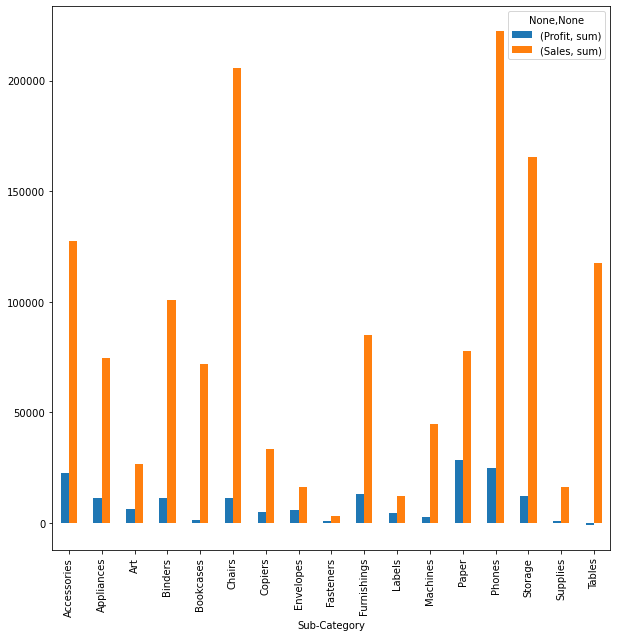

In [76]:
df.groupby("Sub-Category")[["Profit", "Sales"]].agg(["sum"]).plot.bar(figsize=(10,10))
plt.show()

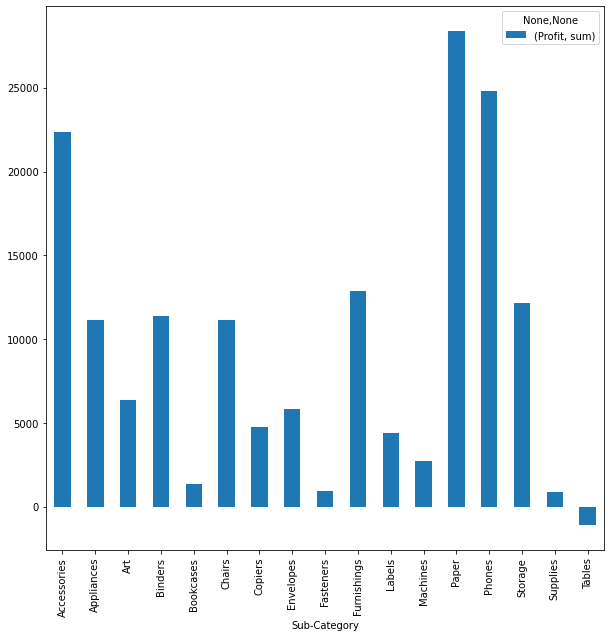

In [77]:
df.groupby("Sub-Category")[["Profit"]].agg(["sum"]).plot.bar(figsize=(10,10))
plt.show()

#### We can conclude that papers generate the maximum profit. 
#### We can see that tables have high sales but is incurring losses. Bookcases, fasteners and supplies generate the least profit.

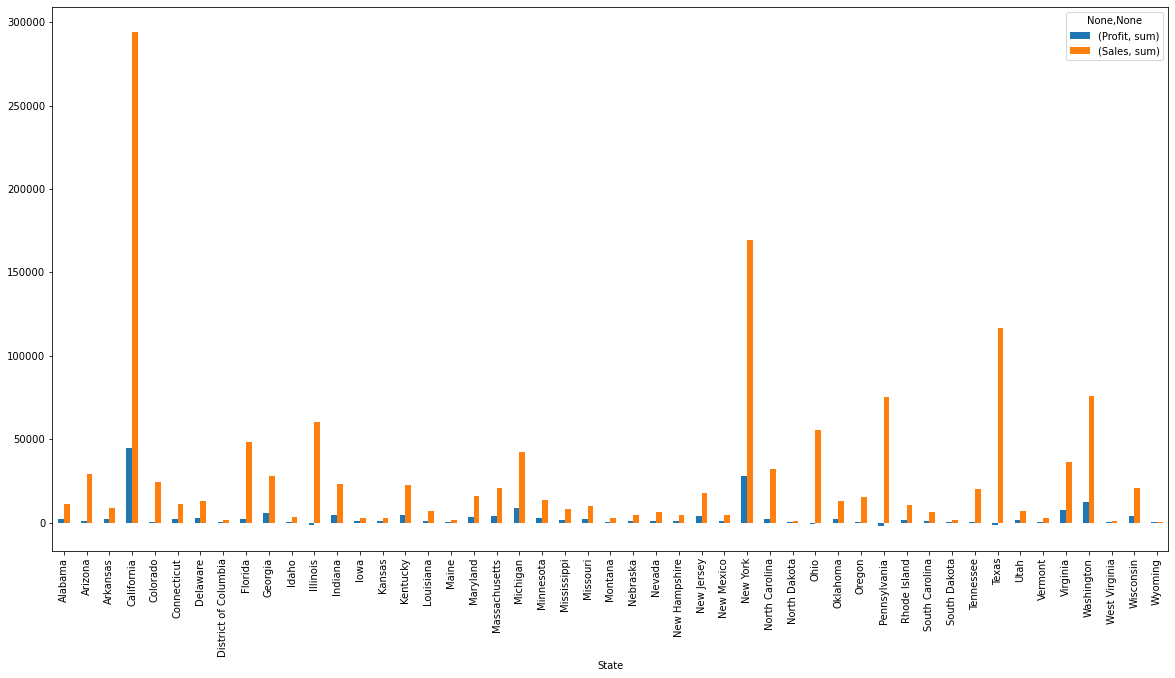

In [74]:
df.groupby("State")[["Profit", "Sales"]].agg(["sum"]).plot.bar(figsize=(20,10))
plt.show()

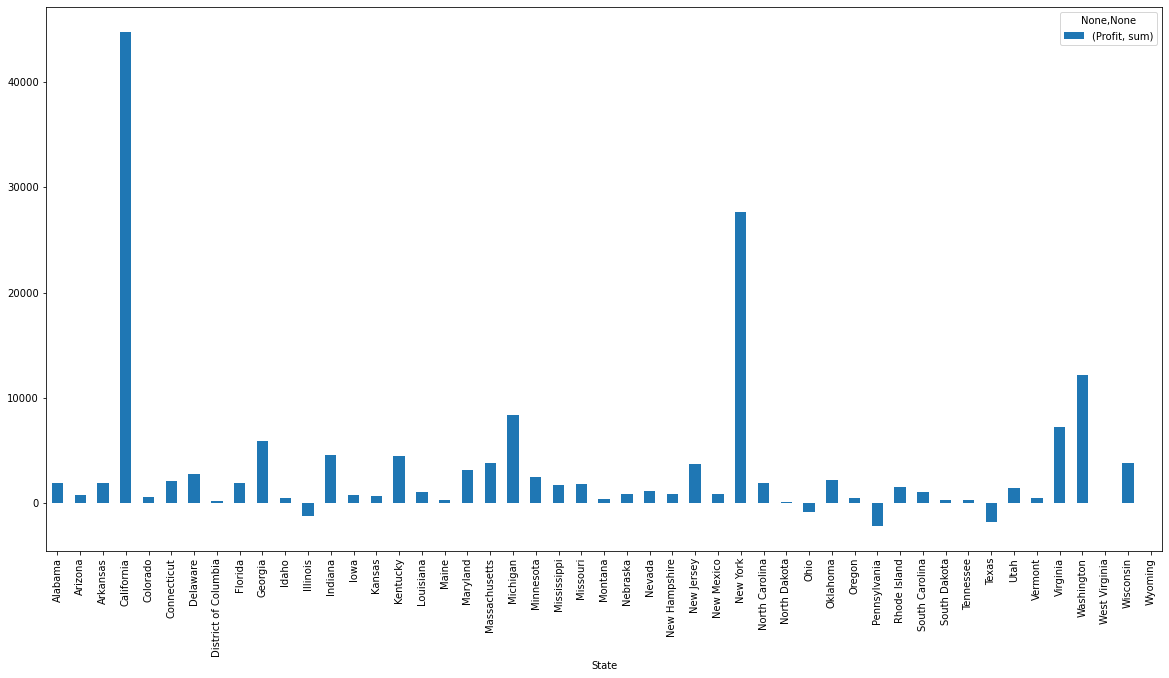

In [89]:
df.groupby("State")[["Profit"]].agg(["sum"]).plot.bar(figsize=(20,10))
plt.show()

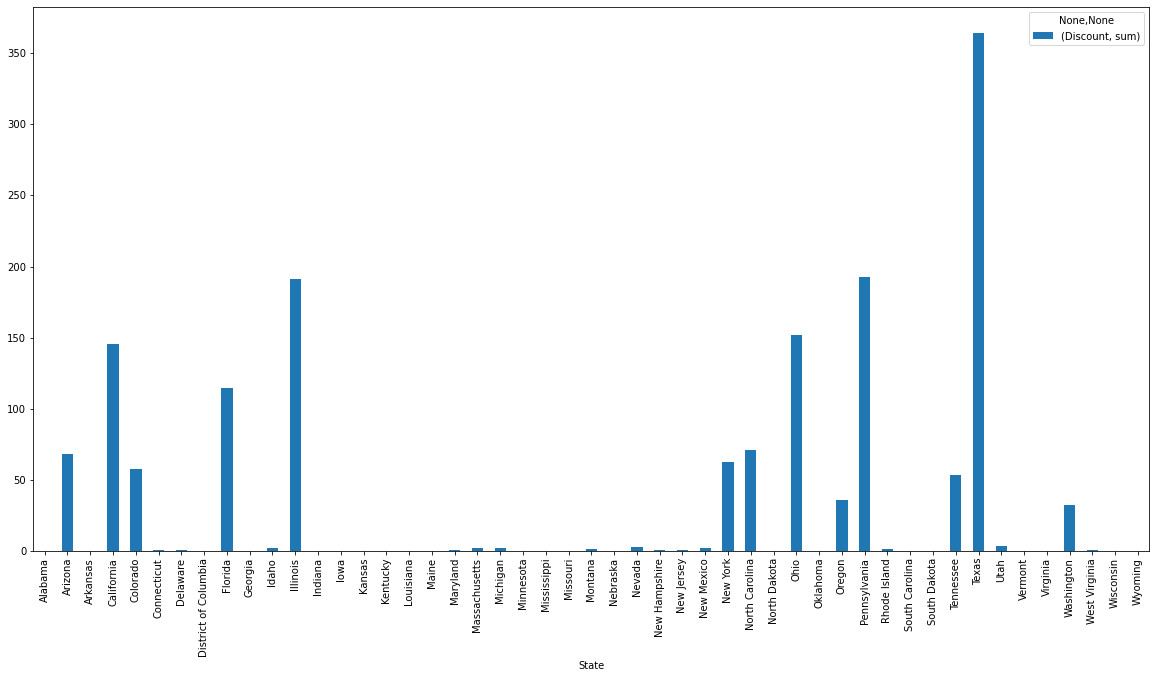

In [90]:
df.groupby("State")[["Discount"]].agg(["sum"]).plot.bar(figsize=(20,10))
plt.show()

#### We can see that Illinois, Ohio, Pennysylvania and Texas incurr losses. They are also the states which give maximum discounts to customers. 
#### We can conclude that Texas gives huge discount and thus, is in loss. 
#### California is making the most profits followed by New York.

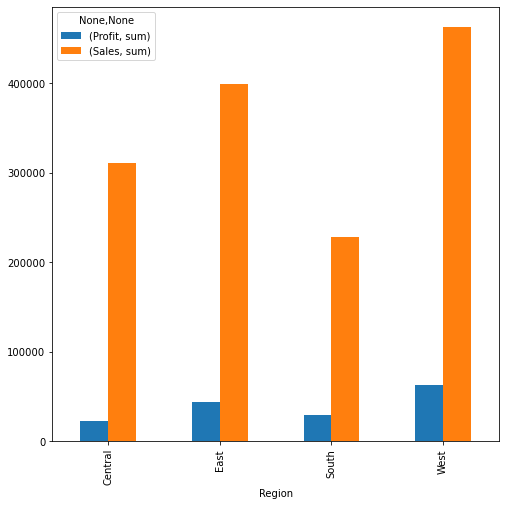

In [86]:
df.groupby("Region")[["Profit", "Sales"]].agg(["sum"]).plot.bar(figsize = (8,8))
plt.show()

### We see that West region has the maximum sales and generates maximum profit, followed by East region. 

<AxesSubplot:xlabel='Region', ylabel='Profit'>

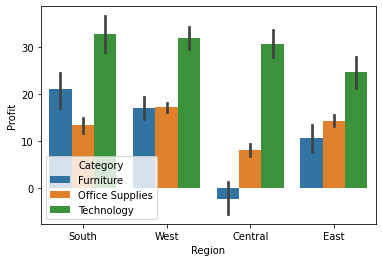

In [87]:
sns.barplot(x= df.Region, y=df.Profit, hue=df.Category)

### The West is making most of the profit in Technology sector. Central is incurring loss in Furnitures. 
### Technology is making profits in all the sectors.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

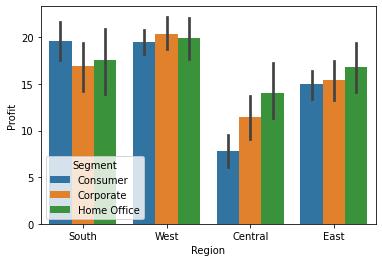

In [88]:
sns.barplot(x= df.Region, y=df.Profit, hue=df.Segment)

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

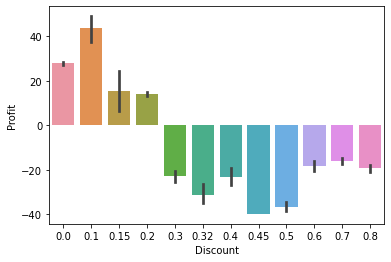

In [83]:
sns.barplot(x=df.Discount, y=df.Profit)

### All the discounts more than 20% result in loss for the company. 

# Thank You